In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
X_test = pd.read_csv('./hw1-data/X_test.csv', header = None)
X_test = X_test.to_numpy()
X_train = pd.read_csv('./hw1-data/X_train.csv', header = None)
X_train = X_train.to_numpy()
y_test = pd.read_csv('./hw1-data/y_test.csv', header = None)
y_test = y_test.to_numpy()
y_train = pd.read_csv('./hw1-data/y_train.csv', header = None)
y_train = y_train.to_numpy()

#### Part 1: Solve the Ridge Regression Problem
$$L = \lambda \|w\|^2 + \sum_{i=1}^{350} \| y_i - x_{i}^{T}w \|^2$$

$$\nabla_wL = -2X^Ty + 2X^TXw + 2\lambda w = 0$$

$$w_{RR} = (\lambda I + X^TX)^{-1} X^Ty$$

a. For $\lambda = 0,1,2,3,...,5000$, solve for $w_{RR}$ 

In [3]:
def ridge_coeff (X, y, alpha):
    n, m = X.shape
    I = np.identity(m)
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha*I), X.T), y)
    df = np.trace(np.dot(X, np.dot(np.linalg.inv(np.dot(X.T, X) + alpha*I), X.T)))
    
    return w,df

In [4]:
wls_1 = {}
wls_2 = {}
wls_3 = {}
wls_4 = {}
wls_5 = {}
wls_6 = {}
wls_7 = {}
wrr = []

for a in range(5001):
    w, df = ridge_coeff(X_train, y_train, a)
    wrr.append(w)
    wls_1[a] = [w[0], df]
    wls_2[a] = [w[1], df]
    wls_3[a] = [w[2], df]
    wls_4[a] = [w[3], df]
    wls_5[a] = [w[4], df]
    wls_6[a] = [w[5], df]
    wls_7[a] = [w[6], df]

In [5]:
df_w1 = pd.DataFrame.from_dict(wls_1, orient = "index", columns = ['w_value', 'df'])
df_w2 = pd.DataFrame.from_dict(wls_2, orient = "index", columns = ['w_value', 'df'])
df_w3 = pd.DataFrame.from_dict(wls_3, orient = "index", columns = ['w_value', 'df'])
df_w4 = pd.DataFrame.from_dict(wls_4, orient = "index", columns = ['w_value', 'df'])
df_w5 = pd.DataFrame.from_dict(wls_5, orient = "index", columns = ['w_value', 'df'])
df_w6 = pd.DataFrame.from_dict(wls_6, orient = "index", columns = ['w_value', 'df'])
df_w7 = pd.DataFrame.from_dict(wls_7, orient = "index", columns = ['w_value', 'df'])

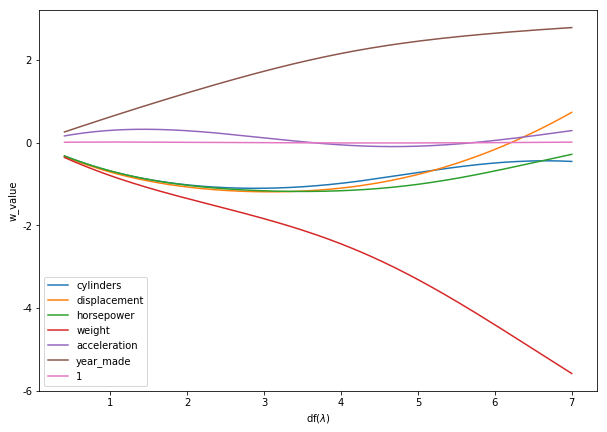

In [72]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
#ax = plt.scatter(df_w1.df,df_w1.w_value, s = 8, label = 'cylinders')
ax = plt.plot(df_w1.df,df_w1.w_value, label = 'cylinders')

#ax = plt.scatter(df_w2.df,df_w2.w_value, s = 8, label = 'displacement')
ax = plt.plot(df_w2.df,df_w2.w_value, label = 'displacement')

#ax = plt.scatter(df_w3.df,df_w3.w_value, s = 8, label = 'horsepower')
ax = plt.plot(df_w3.df,df_w3.w_value, label = 'horsepower')

#ax = plt.scatter(df_w4.df,df_w4.w_value, s = 8, label = 'weight')
ax = plt.plot(df_w4.df,df_w4.w_value, label = 'weight')

#ax = plt.scatter(df_w5.df,df_w5.w_value, s = 8, label = 'acceleration')
ax = plt.plot(df_w5.df,df_w5.w_value, label = 'acceleration')

#ax = plt.scatter(df_w6.df,df_w6.w_value, s = 8, label = 'year_made')
ax = plt.plot(df_w6.df,df_w6.w_value, label = 'year_made')

#ax = plt.scatter(df_w7.df,df_w7.w_value, s = 8, label = '1')
ax = plt.plot(df_w7.df,df_w7.w_value, label = '1')

plt.ylabel('w_value')
plt.xlabel('df($\lambda$)')
plt.legend();
plt.savefig('3a.png')

b. Clearly, year_made and weight are the two dimensions that stood out over the others. They are the most important features in determining the miles per gallon a car will get. Since year_made is positive, it means that the miles per gallon will increase as car years increase; since weight is negative, the miles per gallon will decrease as car weight increases.

c. predict 42 test cases, for $\lambda = 0,...,50$

In [7]:
def get_rmse(test, pred):
    rmse = np.sqrt(np.sum(np.square(test - pred))/len(test))
    #print(rmse)
    return rmse

In [8]:
rmse_ls = []
for alpha in range(51):
    #print(wrr[alpha])
    y_pred = np.dot(X_test, wrr[alpha])
    #print(y_pred)
    rmse = get_rmse(y_test, y_pred)
    rmse_ls.append(rmse)

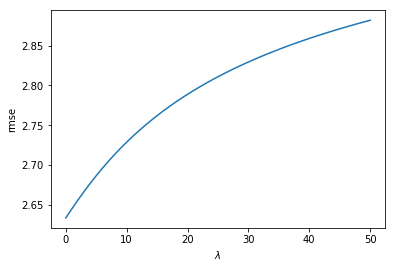

In [73]:
plt.plot(rmse_ls);
plt.ylabel('rmse');
plt.xlabel('$\lambda$');
plt.savefig('3c.png')

RMSE increases as $\lambda$ increases. The lowest RMSE is when $\lambda$ equals zero. Also, as hinted in part (a), when $\lambda = 0$, $w_{RR} = w_{LS}$. Thus, $\lambda = 0$ also gives the least squares solution that generates the least RMSE. Thus, as a conclusion, we should use least squares instead of ridge regression. 

#### Part 2: polynomial regression model

In [24]:
def get_poly2(mx):
    mx2 = np.power(mx[:, 0:6], 2)
    mx2 = (mx2 - mx2.mean(0))/(mx2.std(0))
    rst = np.hstack((mx, mx2))
    
    return rst

In [29]:
def get_poly3(mx):
    
    mx2 = np.power(mx[:, 0:6], 2)
    mx2 = (mx2 - mx2.mean(0))/(mx2.std(0))
    
    mx3 = np.power(mx[:, 0:6], 3)
    mx3 = (mx3 - mx3.mean(0))/(mx3.std(0))
    
    rst = np.hstack((mx,mx2,mx3))
    
    return rst

In [41]:
def get_poly2_test(mx, mx_t):
    
    mx2 = np.power(mx[:, 0:6], 2)
    mx2_t = np.power(mx_t[:, 0:6], 2)
    
    mx2_t = (mx2_t - mx2.mean(0))/(mx2.std(0))
    rst = np.hstack((mx_t, mx2_t))
    
    return rst

In [53]:
def get_poly3_test(mx, mx_t):
    
    mx2 = np.power(mx[:, 0:6], 2)
    mx2_t = np.power(mx_t[:, 0:6], 2)
    
    mx2_t = (mx2_t - mx2.mean(0))/(mx2.std(0))
    
    mx3 = np.power(mx[:, 0:6], 3)
    mx3_t = np.power(mx_t[:, 0:6], 3)
    
    mx3_t = (mx3_t - mx3.mean(0))/(mx3.std(0))
    
    rst = np.hstack((mx_t, mx2_t,mx3_t))
    
    return rst

In [54]:
X_train2, mu2, st2 = get_poly2(X_train)
X_test2 = get_poly2_test(X_train, X_test)

In [55]:
X_train3, mu3, st3 = get_poly3(X_train)
X_test3 = get_poly3_test(X_train, X_test)

In [56]:
rmse_ls1 = []
for a in range(101):
    w1 = ridge_coeff(X_train, y_train, a)
    y_pred = np.dot(X_test, w1[0])
    rmse = get_rmse(y_test, y_pred)
    rmse_ls1.append(rmse)

In [57]:
rmse_ls2 = []
for a in range(101):
    w2 = ridge_coeff(X_train2, y_train, a)
    y_pred2 = np.dot(X_test2, w2[0])
    rmse2 = get_rmse(y_test, y_pred2)
    rmse_ls2.append(rmse2)

In [58]:
rmse_ls3 = []
for a in range(101):
    w3 = ridge_coeff(X_train3, y_train, a)
    y_pred3 = np.dot(X_test3, w3[0])
    rmse3 = get_rmse(y_test, y_pred3)
    rmse_ls3.append(rmse3)

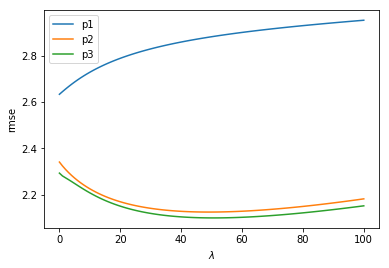

In [74]:
plt.plot(rmse_ls1, label = 'p1');
plt.plot(rmse_ls2, label = 'p2');
plt.plot(rmse_ls3, label = 'p3');
plt.ylabel('rmse');
plt.xlabel('$\lambda$');
plt.legend();
plt.savefig('3d.png')

It seems that we should always pick p = 3, as it always gives the lowest RMSE; in addition, the idea value of $\lambda$ is no longer 0. Instead, the ideal value is somewhere around 50, as the RMSE score is the lowest there.